# Statističke Procene i Error Bars

## Seminarski rad - SISJ

**Autor:** Mihajlovic Luka 2020/0136, Ilic Andrija 2020/0236  
**Datum:** 23.07.2025.

---

### 1. **Što su statističke procene?**

Statističke procene pomažu nam da razumemo podatke kroz **centralne tendencije** i **mere nesigurnosti**.

**Osnovni koncepti:**
- **Procena** - vrednost koju računamo iz uzorka (npr. mean, median)
- **Error bars** - prikazuju nesigurnost oko procene
- **Confidence interval** - interval u kome se verovatno nalazi prava vrednost
- **Bootstrap** - metoda za procenu nesigurnosti

**Tipovi error bars:**
- **Standard deviation (sd)** - pokazuje rasipanje podataka
- **Standard error (se)** - pokazuje preciznost procene
- **Confidence interval (ci)** - interval pouzdanosti (obično 95%)

### **Glavne Seaborn funkcije:**

- **barplot()** - bar chart sa error bars
- **pointplot()** - tačke sa error bars
- **regplot()** - regresija sa confidence bands
- **errorbar** parametar - kontroliše tip error bars

---

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Osnovno podešavanje
sns.set_theme()
print("✅ Biblioteke učitane!")
print(f"Seaborn verzija: {sns.__version__}")

# Učitavanje podataka
tips = sns.load_dataset('tips')
penguins = sns.load_dataset('penguins')

print(f"Tips dataset: {tips.shape}")
print(f"Penguins dataset: {penguins.shape}")

# Osnovne statistike
print(f"\n📊 OSNOVNE STATISTIKE za 'total_bill':")
mean_bill = tips['total_bill'].mean()
std_bill = tips['total_bill'].std()
se_bill = tips['total_bill'].std() / np.sqrt(len(tips))

print(f"Mean (prosek): ${mean_bill:.2f}")
print(f"Standard deviation: ${std_bill:.2f}")
print(f"Standard error: ${se_bill:.2f}")

print(f"\n🔍 Interpretacija:")
print(f"• Prosečan račun je ${mean_bill:.2f}")
print(f"• Računi se kreću oko ±${std_bill:.2f} od proseka")
print(f"• Naša procena proseka je precizna na ±${se_bill:.2f}")

✅ Biblioteke učitane!
Seaborn verzija: 0.13.2
Tips dataset: (244, 7)
Penguins dataset: (344, 7)

📊 OSNOVNE STATISTIKE za 'total_bill':
Mean (prosek): $19.79
Standard deviation: $8.90
Standard error: $0.57

🔍 Interpretacija:
• Prosečan račun je $19.79
• Računi se kreću oko ±$8.90 od proseka
• Naša procena proseka je precizna na ±$0.57


### 2. Error Bars - različiti tipovi

**Error bars** pokazuju nesigurnost oko naše procene.

**Tipovi error bars:**
- **sd** - standard deviation (rasipanje podataka)
- **se** - standard error (preciznost procene)
- **ci** - confidence interval (interval pouzdanosti)
- **pi** - prediction interval (opseg novih vrednosti)

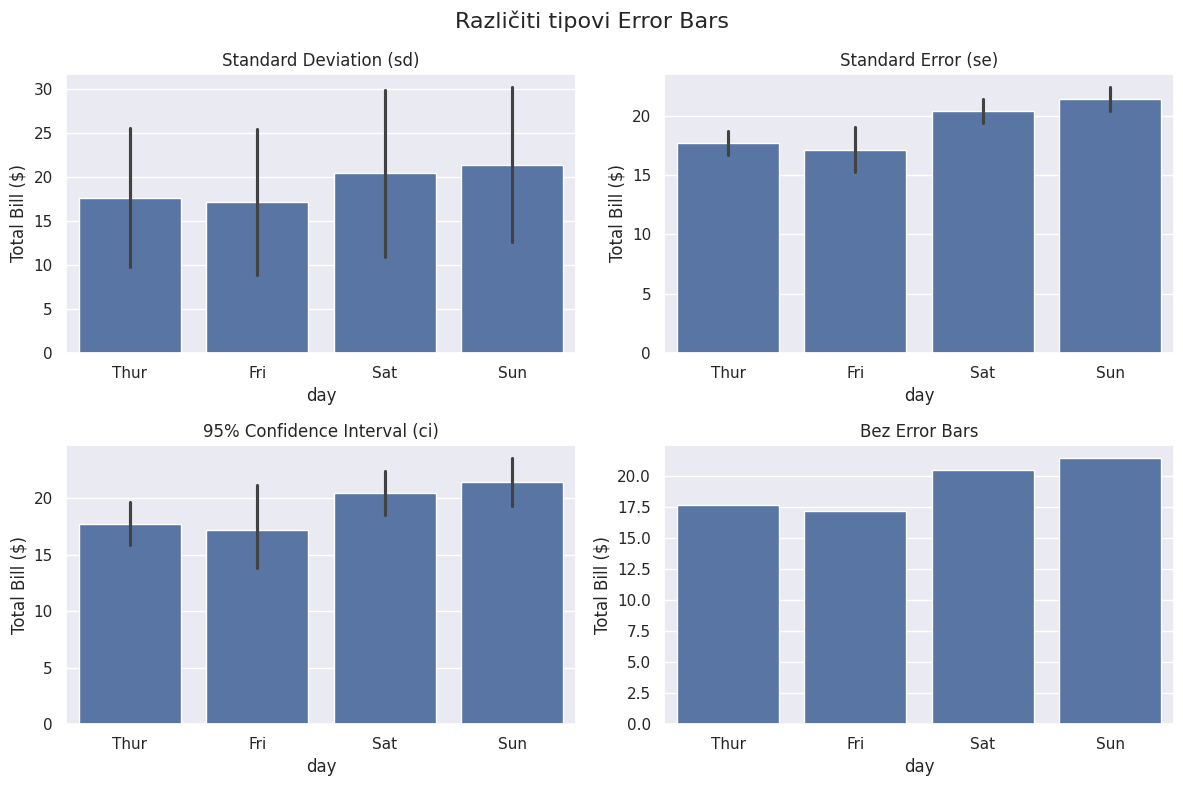

🔍 OBJAŠNJENJE ERROR BARS:
• SD: Pokazuje koliko se podaci rasipaju oko proseka
• SE: Pokazuje koliko je precizna naša procena proseka
• CI: Sa 95% sigurnošću, pravi prosek je u ovom intervalu
• Kraći error bars = preciznija procena


In [2]:
# Error bars - različiti tipovi
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Različiti tipovi Error Bars', fontsize=16)

# 1. Standard deviation
sns.barplot(data=tips, x='day', y='total_bill', errorbar='sd', ax=axes[0,0])
axes[0,0].set_title('Standard Deviation (sd)')
axes[0,0].set_ylabel('Total Bill ($)')

# 2. Standard error
sns.barplot(data=tips, x='day', y='total_bill', errorbar='se', ax=axes[0,1])
axes[0,1].set_title('Standard Error (se)')
axes[0,1].set_ylabel('Total Bill ($)')

# 3. Confidence interval (default)
sns.barplot(data=tips, x='day', y='total_bill', errorbar='ci', ax=axes[1,0])
axes[1,0].set_title('95% Confidence Interval (ci)')
axes[1,0].set_ylabel('Total Bill ($)')

# 4. Bez error bars
sns.barplot(data=tips, x='day', y='total_bill', errorbar=None, ax=axes[1,1])
axes[1,1].set_title('Bez Error Bars')
axes[1,1].set_ylabel('Total Bill ($)')

plt.tight_layout()
plt.show()

print("🔍 OBJAŠNJENJE ERROR BARS:")
print("• SD: Pokazuje koliko se podaci rasipaju oko proseka")
print("• SE: Pokazuje koliko je precizna naša procena proseka") 
print("• CI: Sa 95% sigurnošću, pravi prosek je u ovom intervalu")
print("• Kraći error bars = preciznija procena")

### 3. Bar plots vs Point plots

**Bar plots** i **Point plots** različito prikazuju iste informacije:

- **Bar plots** - visina bara = procena, error bars = nesigurnost
- **Point plots** - tačka = procena, linije = nesigurnost
- **Point plots** bolje za poređenje trendova

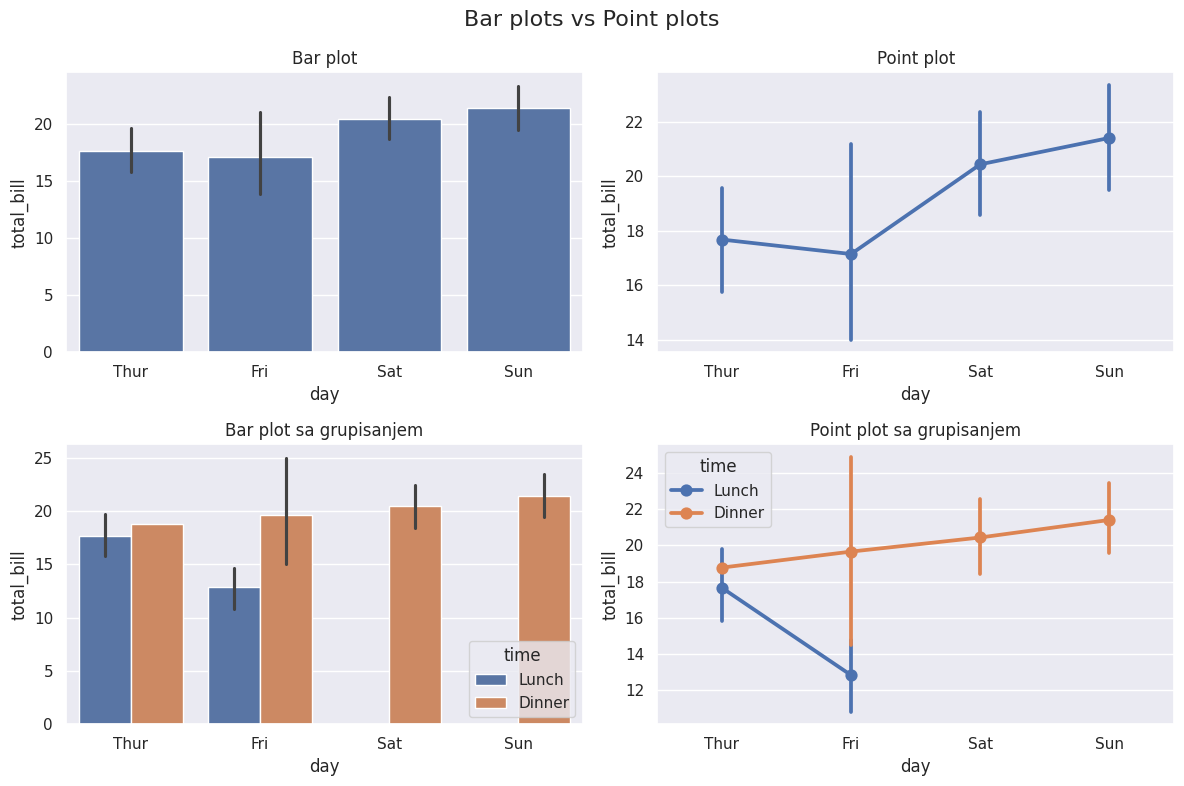

📊 STATISTIKE PO DANIMA:
      count   mean   std
day                     
Thur     62  17.68  7.89
Fri      19  17.15  8.30
Sat      87  20.44  9.48
Sun      76  21.41  8.83

💡 KADA KORISTITI:
• Bar plot: za jasno prikazavanje pojedinačnih vrednosti
• Point plot: za poređenje trendova između grupa
• Point plot: kada imamo puno kategorija


/tmp/ipykernel_63985/2087676350.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_stats = tips.groupby('day')['total_bill'].agg(['count', 'mean', 'std']).round(2)


In [3]:
# Bar plots vs Point plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Bar plots vs Point plots', fontsize=16)

# 1. Bar plot osnovni
sns.barplot(data=tips, x='day', y='total_bill', ax=axes[0,0])
axes[0,0].set_title('Bar plot')

# 2. Point plot osnovni
sns.pointplot(data=tips, x='day', y='total_bill', ax=axes[0,1])
axes[0,1].set_title('Point plot')

# 3. Bar plot sa grupisanjem
sns.barplot(data=tips, x='day', y='total_bill', hue='time', ax=axes[1,0])
axes[1,0].set_title('Bar plot sa grupisanjem')

# 4. Point plot sa grupisanjem
sns.pointplot(data=tips, x='day', y='total_bill', hue='time', ax=axes[1,1])
axes[1,1].set_title('Point plot sa grupisanjem')

plt.tight_layout()
plt.show()

# Statistička analiza
daily_stats = tips.groupby('day')['total_bill'].agg(['count', 'mean', 'std']).round(2)
print("📊 STATISTIKE PO DANIMA:")
print(daily_stats)

print("\n💡 KADA KORISTITI:")
print("• Bar plot: za jasno prikazavanje pojedinačnih vrednosti")
print("• Point plot: za poređenje trendova između grupa")
print("• Point plot: kada imamo puno kategorija")

### 4. Različiti estimatori

**Estimator** određuje kako računamo centralnu vrednost:

- **mean** - aritmetička sredina (default)
- **median** - srednja vrednost
- **sum** - zbir svih vrednosti
- **count** - broj observacija

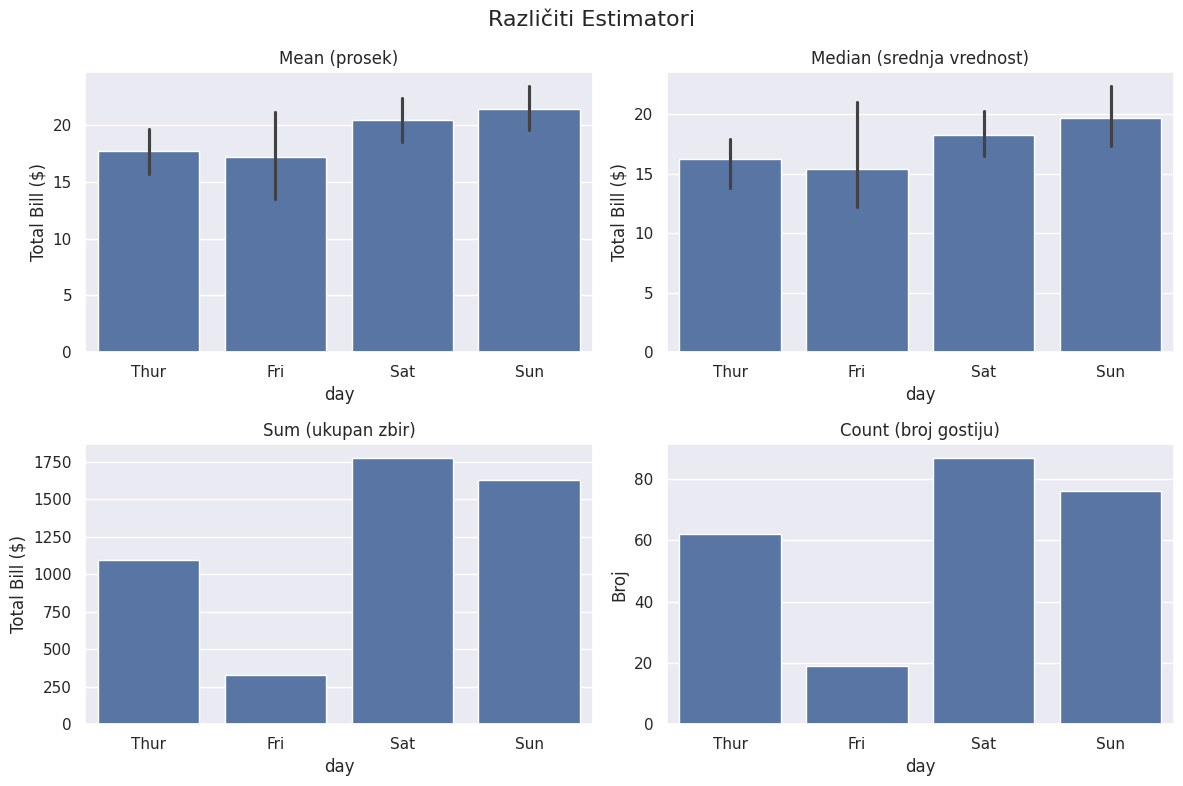

🔍 MEAN vs MEDIAN po danima:
       mean  median
day                
Thur  17.68   16.20
Fri   17.15   15.38
Sat   20.44   18.24
Sun   21.41   19.63

💡 RAZLIKA MEAN vs MEDIAN:
• Mean: osećljiv na outliere (ekstremne vrednosti)
• Median: robusniji, manje utiču outlieri
• Ako mean > median → pozitivno skewed podaci


/tmp/ipykernel_63985/2447171767.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_comparison = tips.groupby('day')['total_bill'].agg(['mean', 'median']).round(2)


In [4]:
# Različiti estimatori
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Različiti Estimatori', fontsize=16)

# 1. Mean (default)
sns.barplot(data=tips, x='day', y='total_bill', estimator='mean', ax=axes[0,0])
axes[0,0].set_title('Mean (prosek)')
axes[0,0].set_ylabel('Total Bill ($)')

# 2. Median
sns.barplot(data=tips, x='day', y='total_bill', estimator='median', ax=axes[0,1])
axes[0,1].set_title('Median (srednja vrednost)')
axes[0,1].set_ylabel('Total Bill ($)')

# 3. Sum
sns.barplot(data=tips, x='day', y='total_bill', estimator='sum', errorbar=None, ax=axes[1,0])
axes[1,0].set_title('Sum (ukupan zbir)')
axes[1,0].set_ylabel('Total Bill ($)')

# 4. Count
sns.countplot(data=tips, x='day', ax=axes[1,1])
axes[1,1].set_title('Count (broj gostiju)')
axes[1,1].set_ylabel('Broj')

plt.tight_layout()
plt.show()

# Poređenje mean vs median
day_comparison = tips.groupby('day')['total_bill'].agg(['mean', 'median']).round(2)
print("🔍 MEAN vs MEDIAN po danima:")
print(day_comparison)

print(f"\n💡 RAZLIKA MEAN vs MEDIAN:")
print(f"• Mean: osećljiv na outliere (ekstremne vrednosti)")
print(f"• Median: robusniji, manje utiču outlieri")
print(f"• Ako mean > median → pozitivno skewed podaci")

### 5. Regresijske procene

**Regresija** takođe ima procene i nesigurnost:

- **Regression line** - naša procena odnosa
- **Confidence band** - nesigurnost oko linije
- **ci=95** - 95% confidence interval (default)
- **ci=None** - bez confidence band

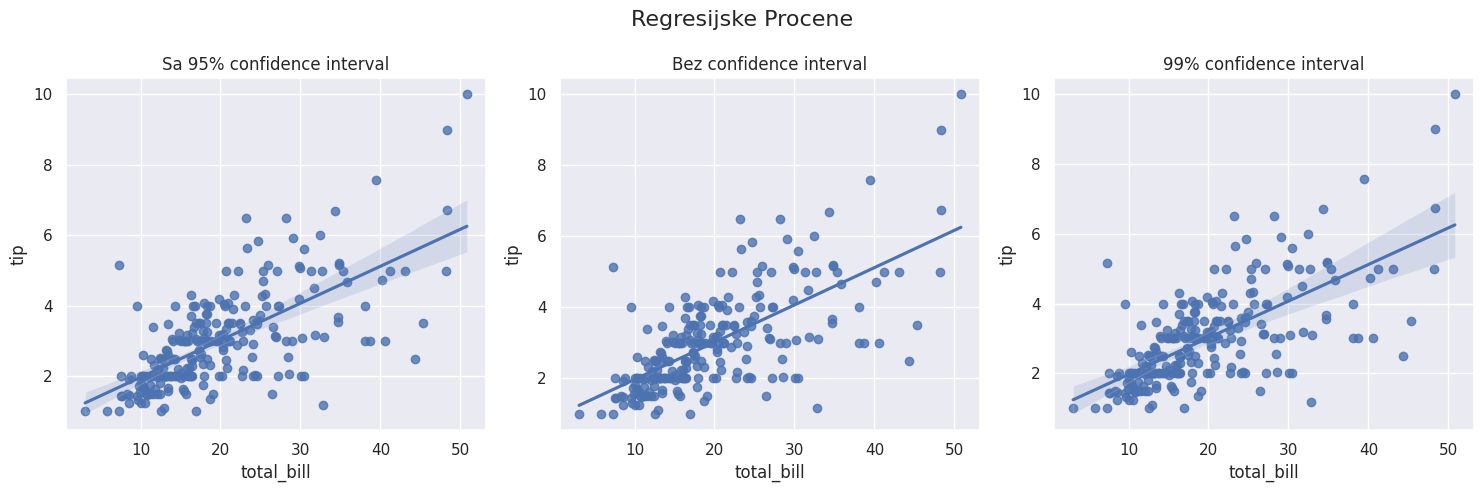

📈 REGRESIJSKA ANALIZA:
Slope (nagib): 0.105
R-squared: 0.457
Standard error: 0.0074
P-vrednost: 6.69e-34

🔍 INTERPRETACIJA:
• Za svaki $1 povećanja računa, napojnica raste za $0.11
• Model objašnjava 45.7% varijanse
• Veza je statistički značajna (p < 0.001)


In [5]:
# Regresijske procene
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Regresijske Procene', fontsize=16)

# 1. Sa confidence interval (default)
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[0])
axes[0].set_title('Sa 95% confidence interval')

# 2. Bez confidence interval
sns.regplot(data=tips, x='total_bill', y='tip', ci=None, ax=axes[1])
axes[1].set_title('Bez confidence interval')

# 3. Širi confidence interval
sns.regplot(data=tips, x='total_bill', y='tip', ci=99, ax=axes[2])
axes[2].set_title('99% confidence interval')

plt.tight_layout()
plt.show()

# Regresijska statistika
slope, intercept, r_value, p_value, std_err = stats.linregress(tips['total_bill'], tips['tip'])

print("📈 REGRESIJSKA ANALIZA:")
print(f"Slope (nagib): {slope:.3f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"Standard error: {std_err:.4f}")
print(f"P-vrednost: {p_value:.2e}")

print(f"\n🔍 INTERPRETACIJA:")
print(f"• Za svaki $1 povećanja računa, napojnica raste za ${slope:.2f}")
print(f"• Model objašnjava {r_value**2*100:.1f}% varijanse")
print(f"• Veza je statistički značajna (p < 0.001)")

### 6. Praktični primer - Penguins analiza

Demonstriraćemo različite statističke procene na penguins datasetu.

🐧 PENGUINS DATASET ANALIZA
Penguins dataset: (333, 7)


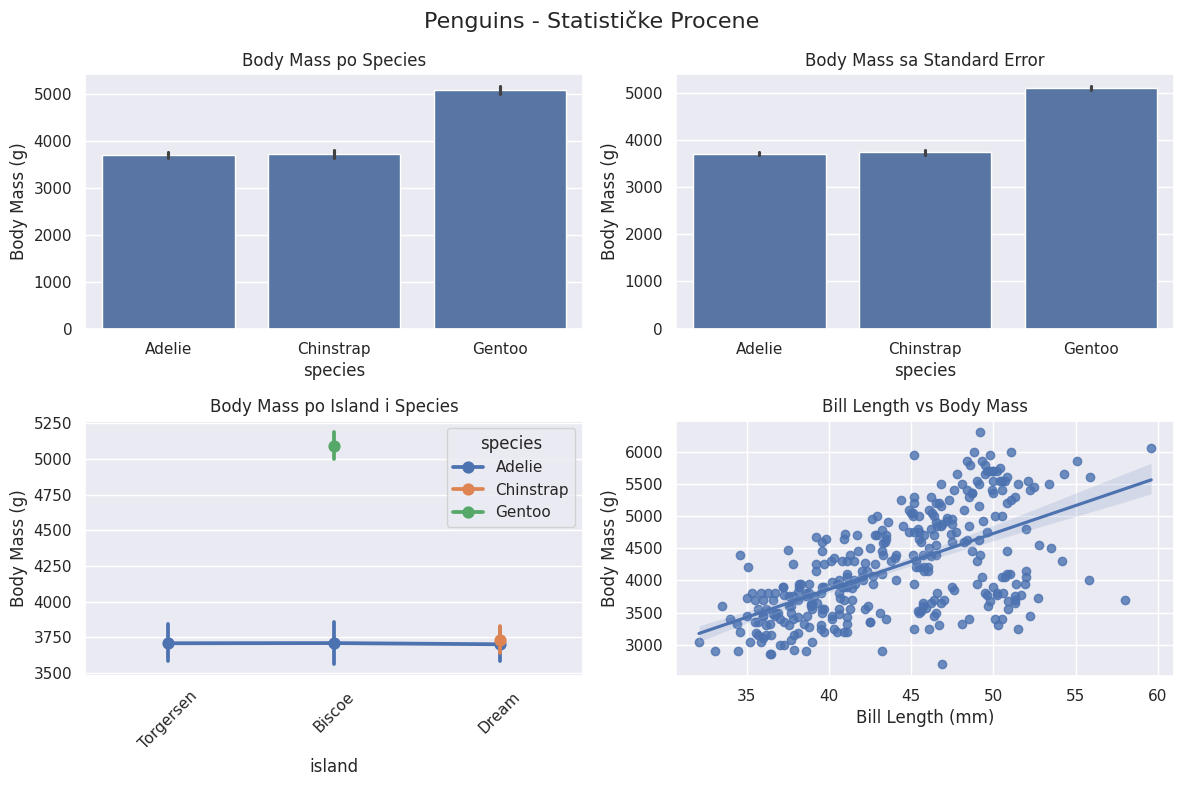

📊 STATISTIKE PO SPECIES:
           count     mean     std     min     max
species                                          
Adelie       146  3706.16  458.62  2850.0  4775.0
Chinstrap     68  3733.09  384.34  2700.0  4800.0
Gentoo       119  5092.44  501.48  3950.0  6300.0

🔗 KORELACIJA Bill Length vs Body Mass:
Korelacija: 0.589
P-vrednost: 1.54e-32
Interpretacija: Umerena pozitivna korelacija


In [6]:
# Praktični primer - Penguins
print("🐧 PENGUINS DATASET ANALIZA")

# Uklanjanje missing values
penguins_clean = penguins.dropna()
print(f"Penguins dataset: {penguins_clean.shape}")

# Kreiranje subplotova
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Penguins - Statističke Procene', fontsize=16)

# 1. Body mass po species
sns.barplot(data=penguins_clean, x='species', y='body_mass_g', ax=axes[0,0])
axes[0,0].set_title('Body Mass po Species')
axes[0,0].set_ylabel('Body Mass (g)')

# 2. Body mass po species sa SE
sns.barplot(data=penguins_clean, x='species', y='body_mass_g', errorbar='se', ax=axes[0,1])
axes[0,1].set_title('Body Mass sa Standard Error')
axes[0,1].set_ylabel('Body Mass (g)')

# 3. Point plot sa island i species
sns.pointplot(data=penguins_clean, x='island', y='body_mass_g', hue='species', ax=axes[1,0])
axes[1,0].set_title('Body Mass po Island i Species')
axes[1,0].set_ylabel('Body Mass (g)')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Regresija bill_length vs body_mass
sns.regplot(data=penguins_clean, x='bill_length_mm', y='body_mass_g', ax=axes[1,1])
axes[1,1].set_title('Bill Length vs Body Mass')
axes[1,1].set_xlabel('Bill Length (mm)')
axes[1,1].set_ylabel('Body Mass (g)')

plt.tight_layout()
plt.show()

# Statistike po species
species_stats = penguins_clean.groupby('species')['body_mass_g'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(2)

print("📊 STATISTIKE PO SPECIES:")
print(species_stats)

# Korelacija bill_length vs body_mass
corr_coef, p_val = stats.pearsonr(penguins_clean['bill_length_mm'], penguins_clean['body_mass_g'])
print(f"\n🔗 KORELACIJA Bill Length vs Body Mass:")
print(f"Korelacija: {corr_coef:.3f}")
print(f"P-vrednost: {p_val:.2e}")
print(f"Interpretacija: {'Jaka' if abs(corr_coef) > 0.7 else 'Umerena' if abs(corr_coef) > 0.3 else 'Slaba'} pozitivna korelacija")

## 7. Zaključak

U ovom notebook-u smo naučili o statističkim procenama i error bars:

### Što smo naučili:
- **Error bars** za prikazivanje nesigurnosti (sd, se, ci)
- **Bar plots vs Point plots** za različite svrhe
- **Različite estimatore** (mean, median, sum, count)
- **Regresijske procene** sa confidence intervals
- **Praktičnu interpretaciju** statističkih rezultata

### Ključni parametri:
1. **errorbar='sd'** - standard deviation
2. **errorbar='se'** - standard error
3. **errorbar='ci'** - confidence interval (default)
4. **estimator='median'** - koristi median umesto mean
5. **ci=None** - bez confidence interval u regplot

### Praktični saveti:
- **Kratki error bars** = preciznija procena
- **SD** pokazuje rasipanje podataka
- **SE** pokazuje preciznost procene
- **CI** pokazuje interval pouzdanosti
- **Point plots** bolje za poređenje trendova

### Kada koristiti:
- **SD** - kada želite pokazati varijabilnost podataka
- **SE** - kada želite pokazati preciznost procene
- **CI** - kada želite interval pouzdanosti (najčešće)
- **Point plots** - za trendove i poređenja
- **Bar plots** - za jasne pojedinačne vrednosti

---

**Napomena**: Razumevanje error bars je ključno za pravilnu interpretaciju rezultata. Uvek obratite pažnju na tip error bara koji koristite!